# Predicting numbers using deepNets in MNIST dataset

###Installing deepNets

First we need to install deepNets package

In [ ]:
!pip install deepNets

##Import necessary packages</br>
Since we need the MNIST dataset make sure you have the folder, it's present by default in Google Colab or else you can simply download and move it your juypter notebook

In [ ]:
from deepNets import Net                              #for constructing networks
import pandas as pd                                   #for reading
import numpy as np                                    #for handling arrays
from sklearn.model_selection import train_test_split  #for train-test split

train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
test = pd.read_csv("/content/sample_data/mnist_test.csv")

*Splitting target and features*

In [ ]:
#training data
y = train.iloc[:,0]
X = train.drop(train.columns[0],axis=1)
#test data
y_test = test.iloc[:,0]
X_test = test.drop(test.columns[0],axis=1)
#View training labels
y.value_counts()

1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 6, dtype: int64

*Some details about our feature variables*

In [ ]:
print(X.isnull().any().describe(),"\n",X_test.isnull().any().describe(),sep="")

count       784
unique        1
top       False
freq        784
dtype: object
count       784
unique        1
top       False
freq        784
dtype: object


##Data-preprocessing


*   Normalizing input to be in the range of 0-1 since we're dealing with classification problem. 
*   Dividing by the max value of each channel (red, green, blue) , since it's a image it will be between 0-255
*   Note that we're using the shape CxHxW where C - no of channels , H - height of the image and W - width of the image.

*Since the MNIST dataset is represented in greyscale the number of channels is 1*



In [ ]:
X = X/255.0
X_test = X_test/255.0
X = X.values.reshape(-1,1,28,28)
X_test = X_test.values.reshape(-1,1,28,28)
y = y.to_numpy()
y_test = y_test.to_numpy() 

**Splitting into training and validation data**</br>
**Visualization of the 16th element in the dataset**

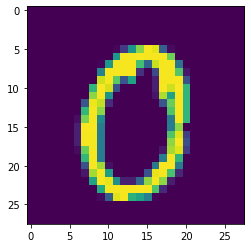

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

X_train,X_val,y_train,y_val= train_test_split(X,y,test_size = 0.2,random_state = 2)  #Splitting by 80% train & 20% validation
plt.imshow(X_train[16][0,:,:])

##Constucting our neural network structure using deepNets
The layers are simply a list/array of dictionaries where each dictionary may be different.</br>
You don't need to worry about the gradients deepNets takes care of that</br>
***Here the order of how you specify the dictionary inside the list is important***

In [ ]:
make_layers = []
make_layers.append({"layer_type":"input","inp":X_train})
make_layers.append({"layer_type":"conv","filters":32,"filter_size":5,"padding":2})
make_layers.append({"layer_type":"batchnorm"})
make_layers.append({"layer_type":"pool","filter_size":2,"stride":2})
make_layers.append({"layer_type":"conv","filters":16,"filter_size":3,"padding":2})
make_layers.append({"layer_type":"batchnorm"})
make_layers.append({"layer_type":"pool","filter_size":2,"stride":2})
make_layers.append({"layer_type":"loss","num_classes":10})
net = Net.Net()             #The Net class helps in constructing the network and initializing your weights
#net.reg = 0.25             #incase you need regularization
net.makeLayers(make_layers) #Net() takes care of the computational graph and makeLayers() makes the initialization part

##Training our neural net

Here you can see that we're using a Trainer helper function of deepNets which basically does all the training and predicting accuracy part. </br>

All you need to do is simply feed in the training and validation data and our neural net model (in our case is called as "net") along with batch_size, learning rate and type of update

In [ ]:
from deepNets import Trainer as trn

trainer = trn.Trainer(net,X_train,y_train,(X_val,y_val),update_rule="sgd_momentum" \
                      ,lr_decay=0.95,optim_config={'learning_rate':0.001},batch_size=100,verbose=False)
trainer.train()

Let's see our best validation score

Best validation accuracy:  98.10%


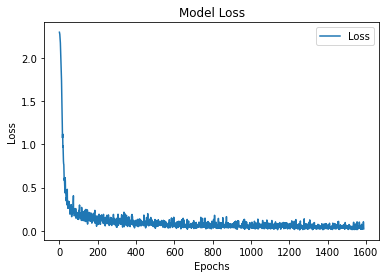

In [ ]:
print("Best validation accuracy: ","{:0.2%}".format(max(trainer.val_acc_history)))
plt.plot(trainer.loss_history)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss'])
plt.show()

##Testing our model on Test set

Predicted:  4
Correct: 


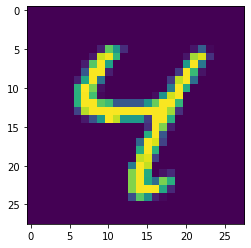

In [ ]:
import random

predict_scores = net.loss(X_test)                 #this uses the best weigths by default
y_pred = list(np.argmax(predict_scores,axis=1))   #Finding the column with highest score taking it's index (since our target variables are indexes)
random_numbers = random.sample(range(0,100),1)    #Feel free to change the second parameter and test it
for number in random_numbers:
  plt.figure()
  plt.imshow(X_test[number][0,:,:])
  print("Predicted: ",y_pred[number])
  print("Correct: ")


For more details on deepNets : [https://github.com/DeepakVelmurugan/deepNets](https://github.com/DeepakVelmurugan/deepNets)